In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [2]:
img = cv.imread('../../imgs/Chapter04/4.6/statue_small.jpg')
mask = np.zeros(img.shape[:2], np.uint8)

bgdModel = np.zeros((1, 65), np.float64)
fgmModel = np.zeros((1, 65), np.float64)

rect = (100, 50, 421, 378)
cv.grabCut(img, mask, rect, bgdModel, fgmModel, 5, cv.GC_INIT_WITH_RECT)
print(mask)
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
img = img * mask2[:, :, np.newaxis]

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 3 3 3]
 [0 0 0 ... 3 3 3]
 [0 0 0 ... 3 3 3]]


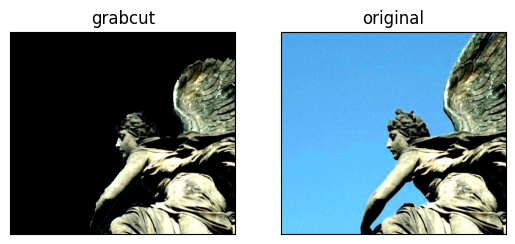

In [3]:
plt.subplot(121)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title("grabcut")
plt.xticks([])
plt.yticks([])

plt.subplot(122)
plt.imshow(cv.cvtColor(cv.imread('../../imgs/Chapter04/4.6/statue_small.jpg'), cv.COLOR_BGR2RGB))
plt.title("original")
plt.xticks([])
plt.yticks([])

plt.show()

In [4]:
img = cv.imread('../../imgs/Chapter04/4.6/beans.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

ret, thresh = cv.threshold(gray, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)
cv.imwrite('../../imgs/Chapter04/4.6/thresh.jpg', thresh)
kernel = np.ones((3, 3), np.uint8)
opening = cv.morphologyEx(thresh, cv.MORPH_OPEN, kernel, iterations = 2)
sure_bg = cv.dilate(opening, kernel, iterations=3)
cv.imwrite('../../imgs/Chapter04/4.6/sure_bg.jpg', sure_bg)


True

In [5]:
dist_transform = cv.distanceTransform(opening, cv.DIST_L2, 5)
ret, sure_fg = cv.threshold(dist_transform, 0.3 * dist_transform.max(), 255, cv.THRESH_BINARY)
cv.imwrite('../../imgs/Chapter04/4.6/sure_fg.jpg', sure_fg)

True

In [6]:
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg, sure_fg)
cv.imwrite('../../imgs/Chapter04/4.6/unknown.jpg', unknown)

True

In [7]:
ret, markers = cv.connectedComponents(sure_bg)
markers = markers + 1
markers[unknown == 255] = 0
cv.imwrite('../../imgs/Chapter04/4.6/markers.jpg', markers)
print(markers)

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


In [11]:
marker = cv.watershed(img, markers)
print(marker)
img[marker == -1] = [255, 255, 0]
cv.imwrite('../../imgs/Chapter04/4.6/beans_splited.jpg', img)

[[-1 -1 -1 ... -1 -1 -1]
 [-1  1  1 ...  1  1 -1]
 [-1  1  1 ...  1  1 -1]
 ...
 [-1  1  1 ...  1  1 -1]
 [-1  1  1 ...  1  1 -1]
 [-1 -1 -1 ... -1 -1 -1]]


True